In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco

FRAC_SEQS_TO_USE = 0.02
NUM_SEQS_TO_USE = int(FRAC_SEQS_TO_USE*len(nanog_profile_wn_contribs))
print("num seqs to use:", NUM_SEQS_TO_USE)

task_names=["Nanog_profile_wn"]
contrib_scores={'Nanog_profile_wn':
                 nanog_profile_wn_contribs[:NUM_SEQS_TO_USE]}
hypothetical_contribs={'Nanog_profile_wn':
                       nanog_profile_wn_hypimp[:NUM_SEQS_TO_USE]}
one_hot=onehot_seq[:NUM_SEQS_TO_USE]

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

num seqs to use: 1104


metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 876
Task 0 hypothetical scores:


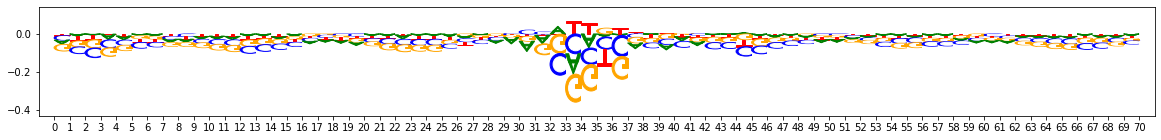

Task 0 actual importance scores:


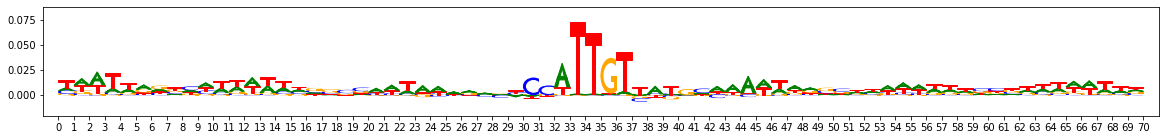

onehot, fwd and rev:


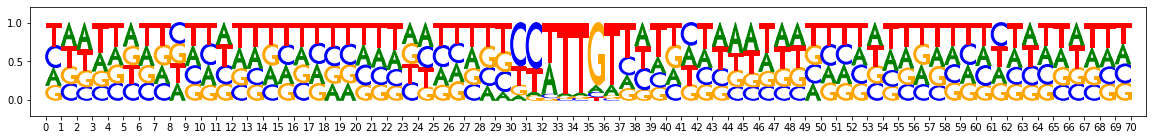

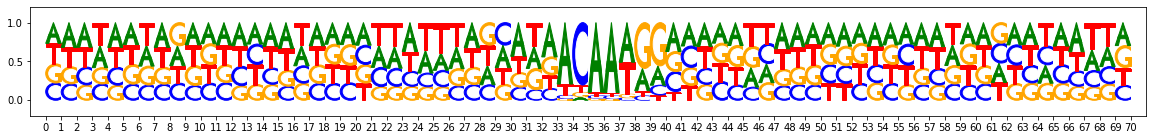

metacluster_0 pattern_1
total seqlets: 838
Task 0 hypothetical scores:


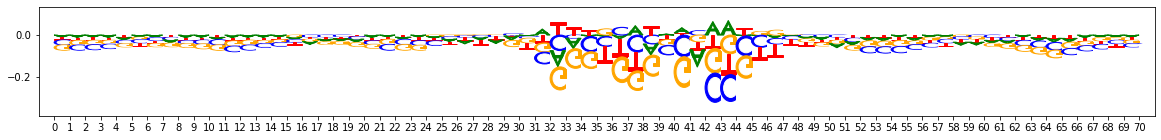

Task 0 actual importance scores:


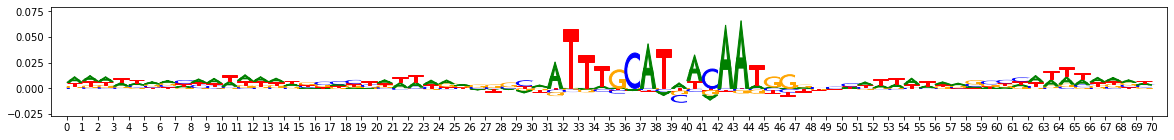

onehot, fwd and rev:


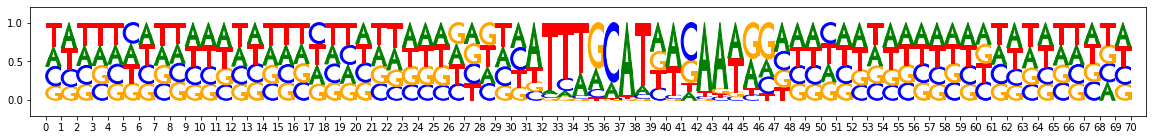

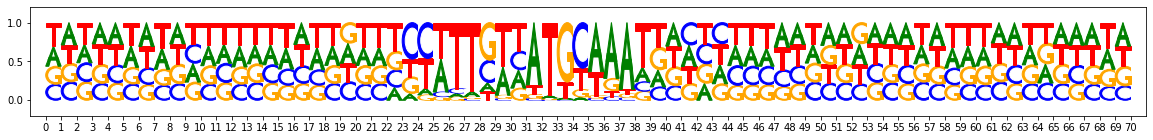

metacluster_0 pattern_2
total seqlets: 400
Task 0 hypothetical scores:


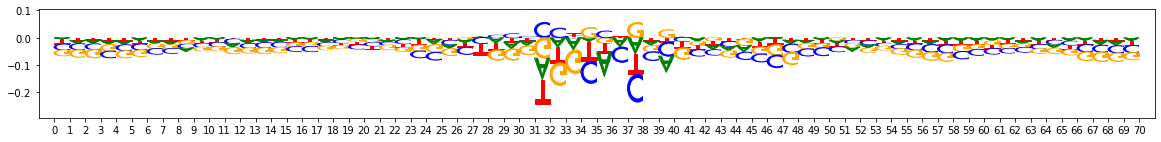

Task 0 actual importance scores:


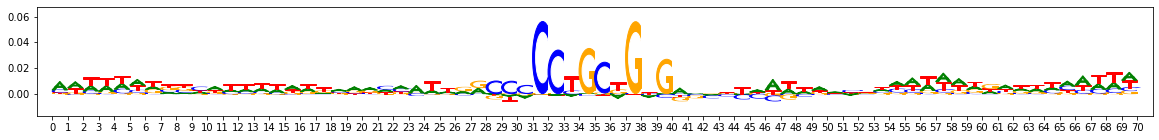

onehot, fwd and rev:


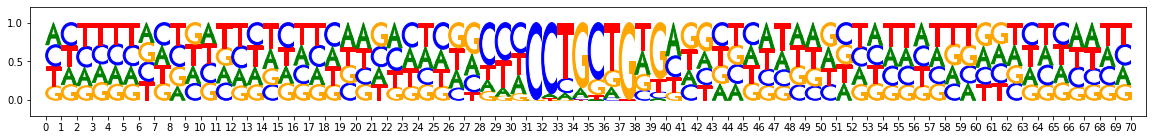

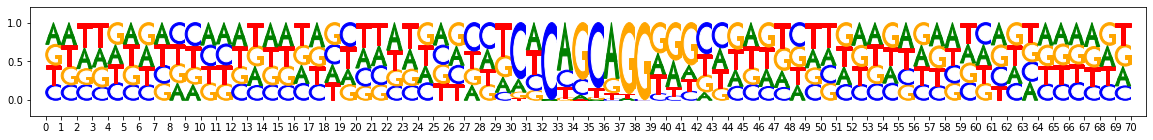

metacluster_0 pattern_3
total seqlets: 349
Task 0 hypothetical scores:


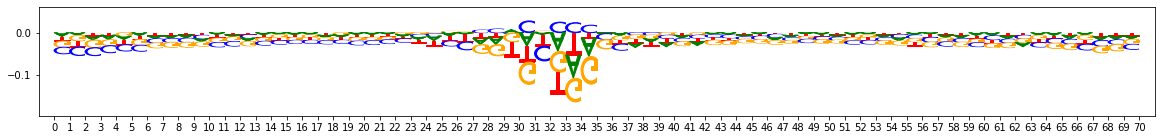

Task 0 actual importance scores:


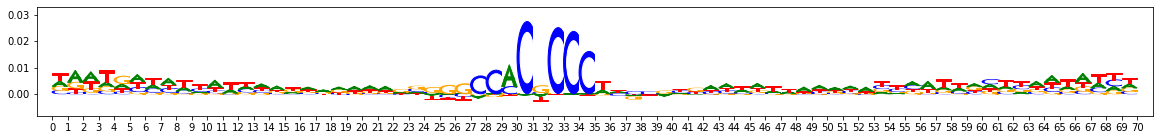

onehot, fwd and rev:


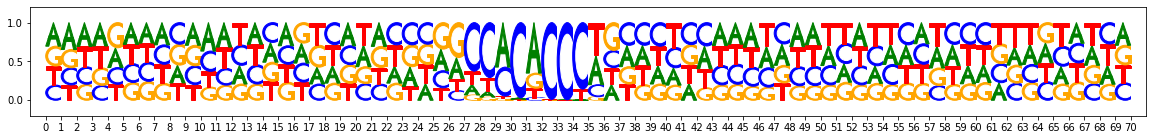

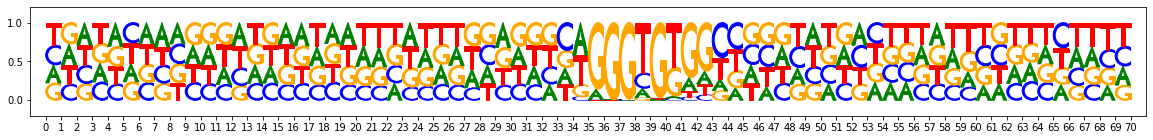

metacluster_0 pattern_4
total seqlets: 334
Task 0 hypothetical scores:


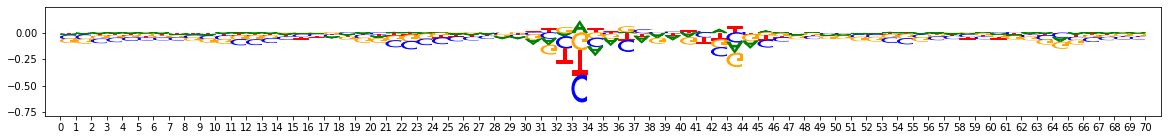

Task 0 actual importance scores:


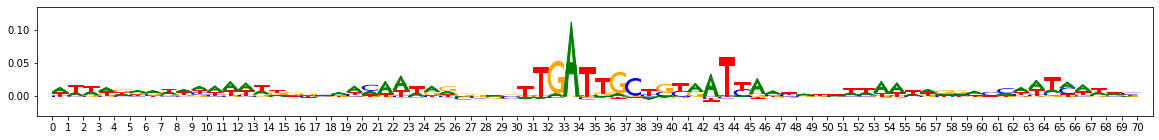

onehot, fwd and rev:


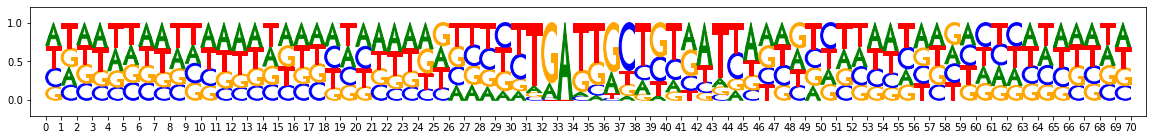

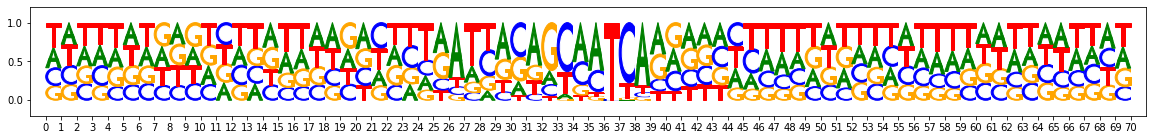

metacluster_0 pattern_5
total seqlets: 330
Task 0 hypothetical scores:


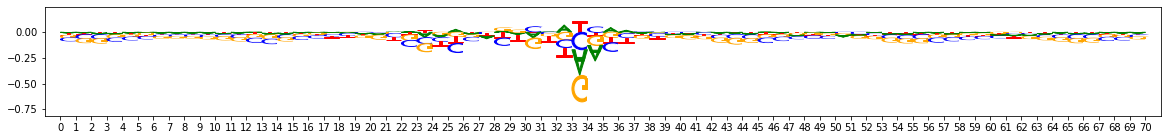

Task 0 actual importance scores:


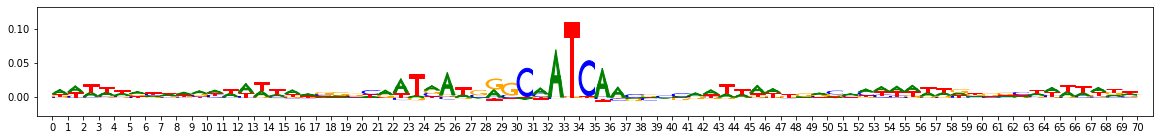

onehot, fwd and rev:


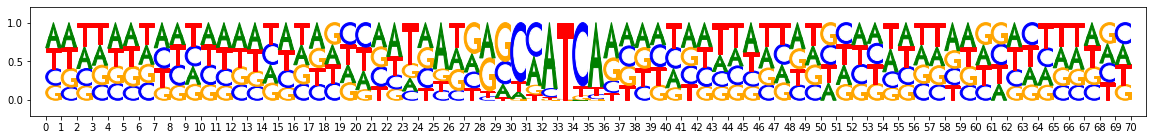

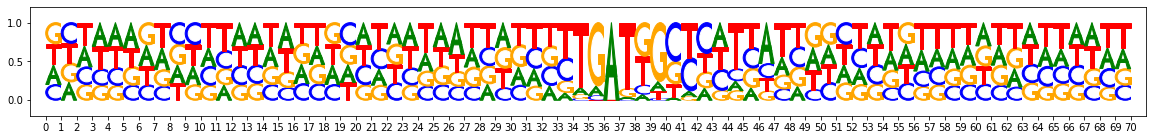

metacluster_0 pattern_6
total seqlets: 272
Task 0 hypothetical scores:


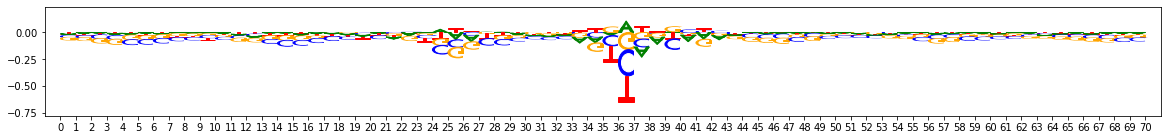

Task 0 actual importance scores:


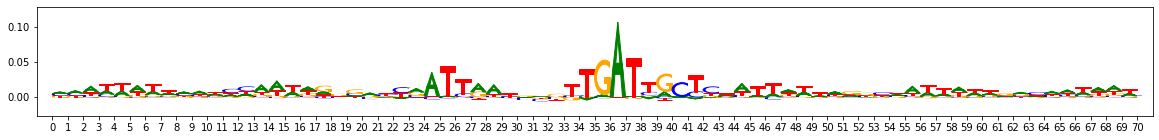

onehot, fwd and rev:


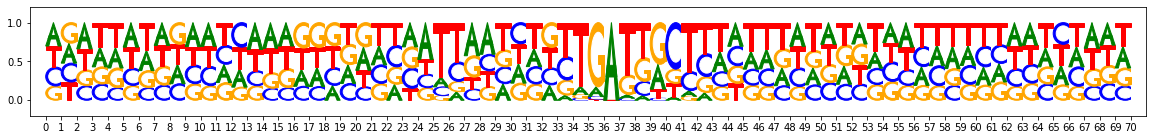

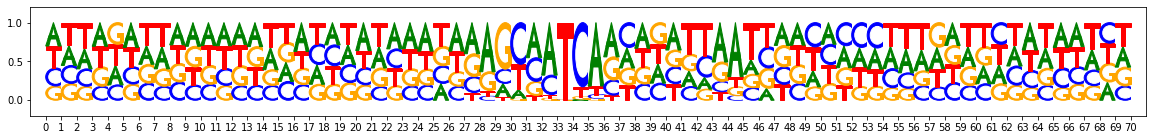

metacluster_0 pattern_7
total seqlets: 249
Task 0 hypothetical scores:


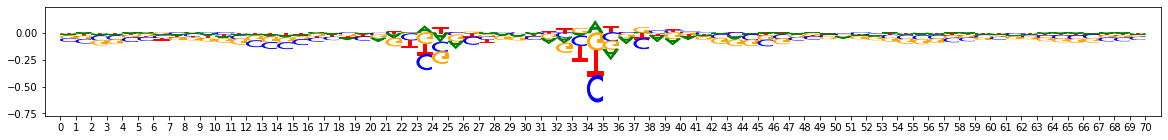

Task 0 actual importance scores:


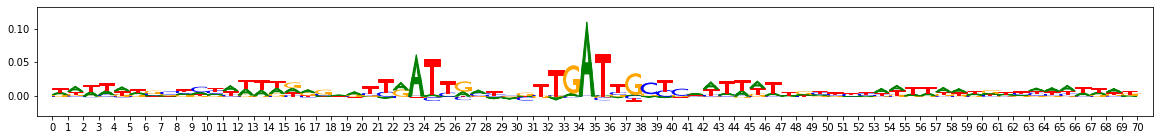

onehot, fwd and rev:


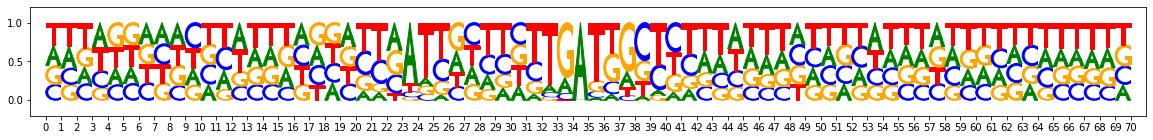

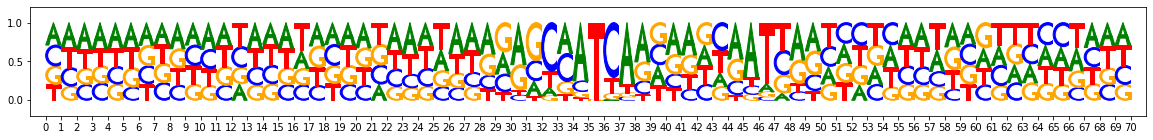

metacluster_0 pattern_8
total seqlets: 174
Task 0 hypothetical scores:


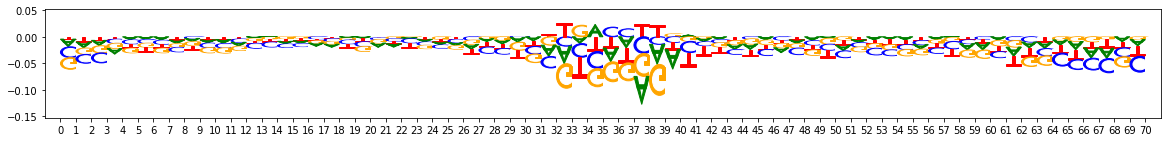

Task 0 actual importance scores:


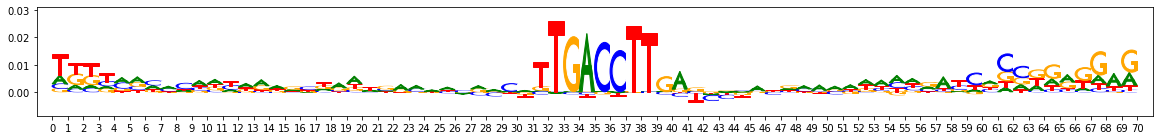

onehot, fwd and rev:


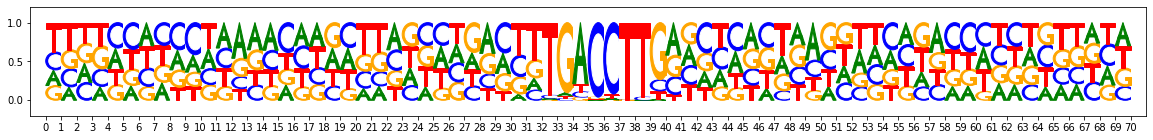

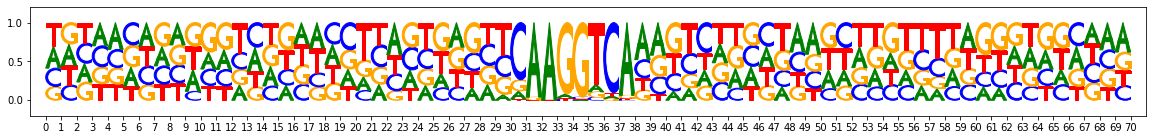

metacluster_0 pattern_9
total seqlets: 170
Task 0 hypothetical scores:


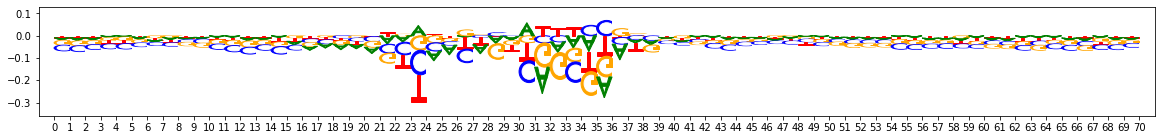

Task 0 actual importance scores:


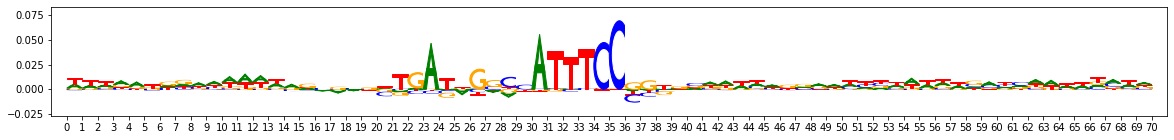

onehot, fwd and rev:


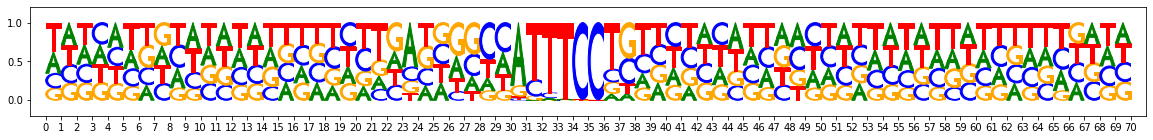

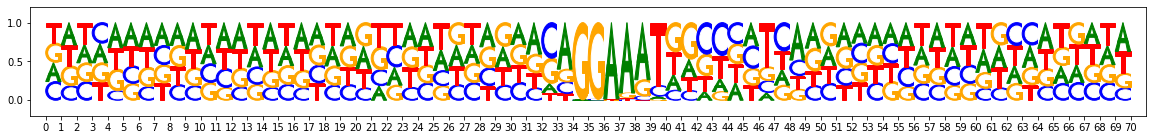

metacluster_0 pattern_10
total seqlets: 122
Task 0 hypothetical scores:


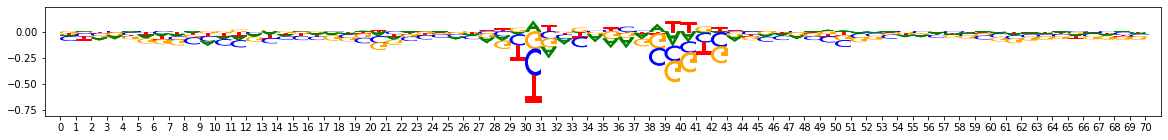

Task 0 actual importance scores:


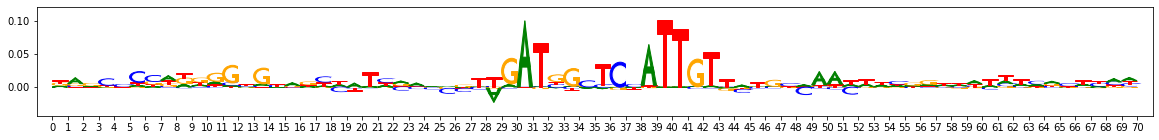

onehot, fwd and rev:


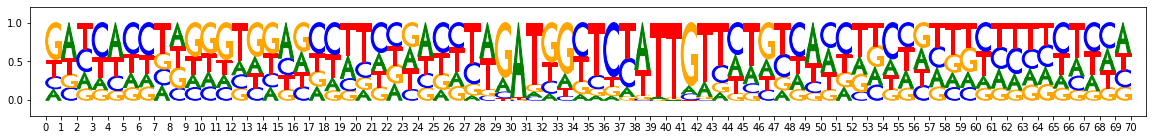

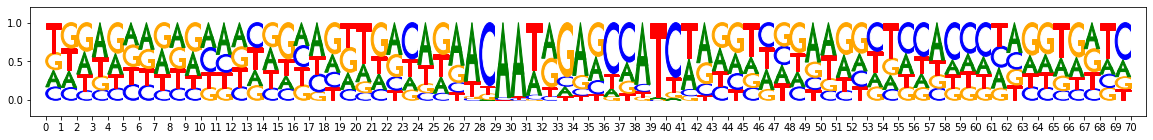

metacluster_0 pattern_11
total seqlets: 97
Task 0 hypothetical scores:


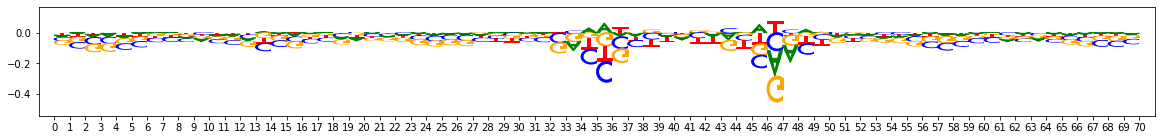

Task 0 actual importance scores:


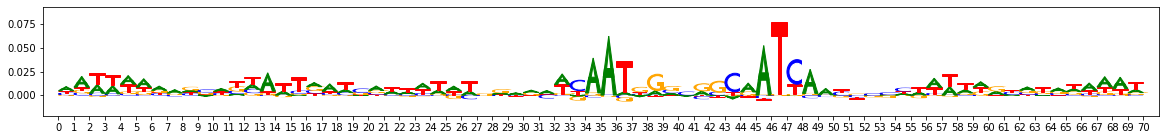

onehot, fwd and rev:


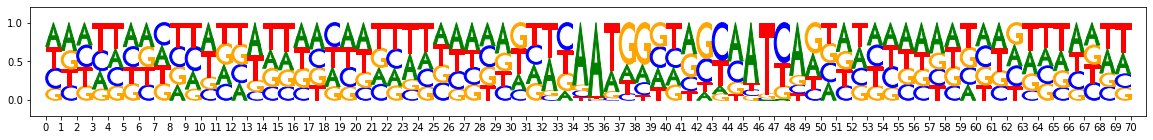

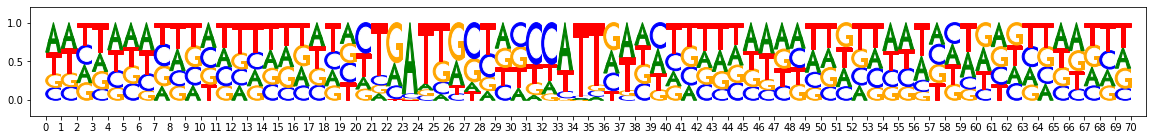

metacluster_0 pattern_12
total seqlets: 95
Task 0 hypothetical scores:


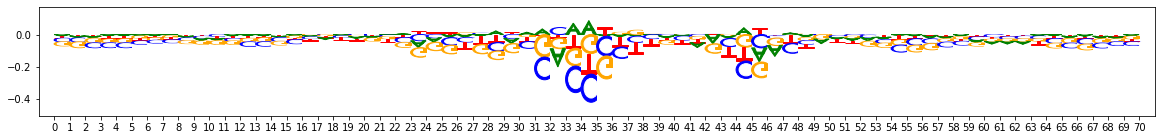

Task 0 actual importance scores:


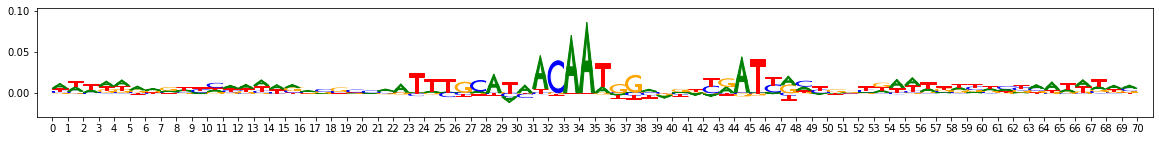

onehot, fwd and rev:


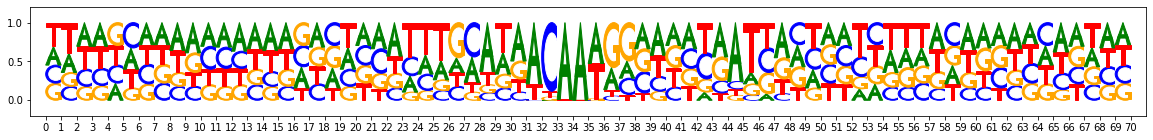

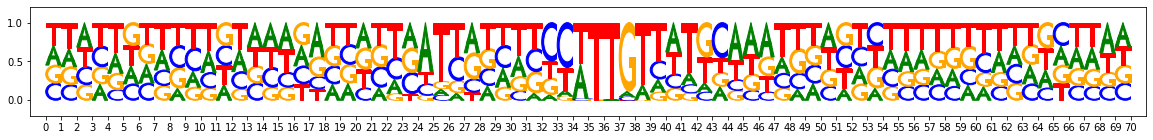

metacluster_0 pattern_13
total seqlets: 101
Task 0 hypothetical scores:


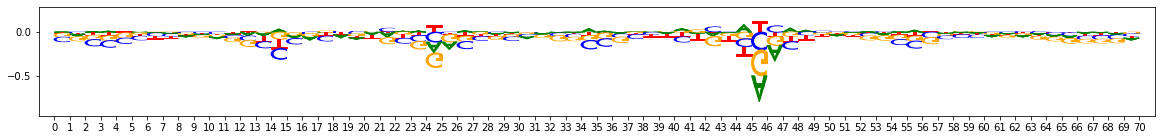

Task 0 actual importance scores:


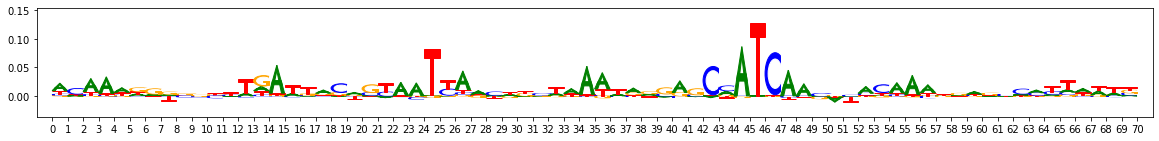

onehot, fwd and rev:


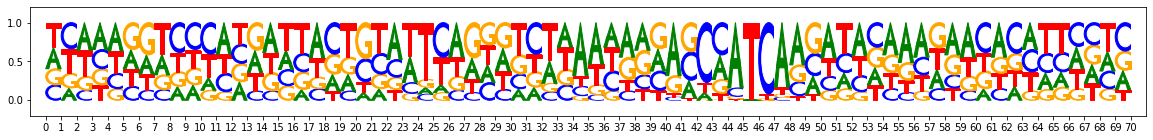

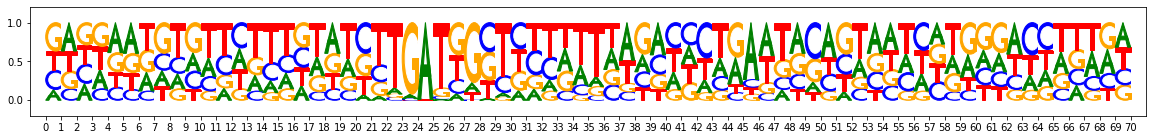

In [3]:
from modisco.visualization import viz_sequence
%matplotlib inline

#Leveraging TryBpNet_AGKM_embeddings_fewerseqlets
file_path = "subset2pc_commit5fe538_agkm_default_results.hdf5"
hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [4]:
#get seqlets for all the coordinates
import modisco

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=task_names, contrib_scores=contrib_scores,
    hypothetical_contribs=hypothetical_contribs,
    one_hot=one_hot
)

grp = h5py.File("subset2pc_commit5fe538_agkm_default_results.hdf5","r")
results = modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(
            grp, track_set=track_set)
grp.close()

In [5]:
patterns = (results.metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

In [6]:
from collections import defaultdict


def flatten_seqlet_impscore_features(seqlet_impscores):
    return np.reshape(seqlet_impscores, (len(seqlet_impscores), -1))


def facility_locator(distmat, num_exemplars):
    exemplars = [] 
    current_bestrep = np.inf*np.ones(distmat.shape[0])
    for i in range(min(num_exemplars, len(distmat))):
        candidate_newbestrep = np.minimum(distmat, current_bestrep[None,:])  
        candidate_objective = np.sum(candidate_newbestrep, axis=-1) 
        next_best_exemplar = np.argmin(candidate_objective) 
        exemplars.append(next_best_exemplar)
        current_bestrep = candidate_newbestrep[next_best_exemplar]
    return exemplars


def compute_continjacc_sims_1vmany(vec1, vecs2):
    sign_vec1, signs_vecs2 = np.sign(vec1), np.sign(vecs2)
    abs_vec1, abs_vecs2 = np.abs(vec1), np.abs(vecs2)
    intersection = np.sum(np.minimum(abs_vec1[None,:], abs_vecs2[:,:])
                          *sign_vec1[None,:]*signs_vecs2[:,:], axis=-1)
    union = np.sum(np.maximum(abs_vec1[None,:], abs_vecs2[:,:]), axis=-1)
    return intersection/union


def compute_pairwise_continjacc_sims(vecs1, vecs2):
    return np.array([compute_continjacc_sims_1vmany(vec1=vec1, vecs2=vecs2)
                     for vec1 in vecs1])
    #compute the pairwise continjacc sims between the vecs
    #signs_vecs1, signs_vecs2 = np.sign(vecs1), np.sign(vecs2)
    #absvals_vecs1, absvals_vecs2 = np.abs(vecs1), np.abs(vecs2)
    #intersection = np.sum(np.minimum(absvals_vecs1[:,None,:], absvals_vecs2[None,:,:])
    #                      *signs_vecs1[:,None,:]*signs_vecs2[None,:,:], axis=-1)
    #union = np.sum(np.maximum(absvals_vecs1[:,None,:], absvals_vecs2[None,:,:]), axis=-1)
    #return intersection/union
    
    
def get_exemplar_aggseqlets(seqlets, pattern_comparison_settings,
                            seqlets_per_exemplar, max_exemplars):
    print("Numseqles:", len(seqlets))
    #seqlets should already be aligned relative to each other
    #extract the features
    fwd_seqlet_data, _ = modisco.core.get_2d_data_from_patterns(
        patterns=seqlets,
        track_names=pattern_comparison_settings.track_names,
        track_transformer=
         pattern_comparison_settings.track_transformer)
    #flatten the fwd_seqlet_data
    fwd_seqlet_data_vectors = flatten_seqlet_impscore_features(fwd_seqlet_data)
    #compute the affinity matrix
    affmat = compute_pairwise_continjacc_sims(vecs1=fwd_seqlet_data_vectors,
                                              vecs2=fwd_seqlet_data_vectors)
    #convert to distance matrix
    distmat = 1/( np.maximum(affmat,1e-7) )
    #get exemplars
    seqlet_exemplar_indices = facility_locator(
        distmat=distmat,
        num_exemplars=min(max_exemplars, int(np.ceil(len(seqlets)/seqlets_per_exemplar)) ))
    #aggregate over the similar ones, return the aggseqlets
    representive_exemplars = np.argmax(affmat[:, seqlet_exemplar_indices],
                                         axis=-1)
    exemplar_to_seqletsandalignments =\
        defaultdict(lambda: modisco.core.SeqletsAndAlignments())
    for seqlet, representive_exemplar in zip(seqlets, representive_exemplars):
        exemplar_to_seqletsandalignments[representive_exemplar].append(
            modisco.core.SeqletAndAlignment(seqlet=seqlet, alnmt=0) )
    exemplar_to_motif = dict([
        (exemplar, modisco.core.AggregatedSeqlet(seqletsandalignments))
        for exemplar,seqletsandalignments in exemplar_to_seqletsandalignments.items()])
    motifs = [exemplar_to_motif[i] for i in sorted(exemplar_to_motif.keys())]
    
    return motifs
    

#for building the classifiers:
PATTERN_COMPARISON_SETTINGS =\
            modisco.affinitymat.core.PatternComparisonSettings(                         
                track_names=["Nanog_profile_wn_hypothetical_contribs",
                             "Nanog_profile_wn_contrib_scores"],                      
                track_transformer=modisco.affinitymat.L1Normalizer(),                   
                min_overlap=0.7)

BG_FREQ = np.mean(one_hot, axis=(0,1))

#start by trimming the patterns to the lengths of the original seqlets
trimmed_patterns = modisco.aggregator.TrimToBestWindowByIC(                                    
                    window_size=41,                           
                    onehot_track_name="sequence",                            
                    bg_freq=BG_FREQ)(patterns)

print("Getting the exemplar motifs")
#Take each pattern
#Identify some number of exemplars and aggregate around them
exemplarmotifs_foreach_pattern = [
  get_exemplar_aggseqlets(
      seqlets=pattern.seqlets,
      pattern_comparison_settings=PATTERN_COMPARISON_SETTINGS,
      seqlets_per_exemplar=30,
      max_exemplars=10) for pattern in trimmed_patterns
]

#Trim to the width used for seqlets
# Positive set: seqlets correctly centered.
# Negative set: seqlets in other motifs + unaligned seqlets
#Score with ALL seqlets & train SVM

Removed 1 duplicate seqlets
Getting the exemplar motifs
Numseqles: 876
Numseqles: 838
Numseqles: 400
Numseqles: 349
Numseqles: 334
Numseqles: 330
Numseqles: 272
Numseqles: 248
Numseqles: 174
Numseqles: 170
Numseqles: 122
Numseqles: 97
Numseqles: 95
Numseqles: 101


In [8]:
#gets the shifts of the provided coordinate - everything except 0
def get_shifts(seqlet_coordinate, shift_fraction, max_seq_len):
    shift_size_in_bp = int((seqlet_coordinate.end-
                            seqlet_coordinate.start)*shift_fraction)
    coordinates_to_return = []
    for shift_size in range(-shift_size_in_bp,shift_size_in_bp+1):
        new_start = seqlet_coordinate.start + shift_size
        new_end = seqlet_coordinate.end + shift_size
        if (new_start >= 0 and new_end <= max_seq_len):
            coordinates_to_return.append(modisco.core.SeqletCoordinates(
                example_idx=seqlet_coordinate.example_idx,
                start=new_start,
                end=new_end,
                is_revcomp=seqlet_coordinate.is_revcomp))
    return coordinates_to_return

print("Getting labels")
all_coordinates = [
    coor
    for pattern in trimmed_patterns
    for seqlet in pattern.seqlets
    for coor in get_shifts(seqlet_coordinate=seqlet.coor, shift_fraction=0.3,
                           max_seq_len=len(one_hot[seqlet.coor.example_idx]))
]
patternidx_to_positivecoordinates = dict([
    (patternidx, set(str(seqlet.coor) for seqlet in trimmed_patterns[patternidx].seqlets))
    for patternidx in range(len(trimmed_patterns))
])
#get the labels for the coordinates depending on the patterns
labels = np.zeros((len(all_coordinates), len(trimmed_patterns)))
for patternidx in range(len(trimmed_patterns)):
    labels[:,patternidx] = np.array([
        1 if str(coor) in patternidx_to_positivecoordinates[patternidx] else 0
        for coor in all_coordinates ])

print("Creating seqlets")
all_coordinates_seqlets = track_set.create_seqlets(coords=all_coordinates)
all_exemplarmotifs = [exemplarmotif
    for patternidx in range(len(trimmed_patterns)) 
    for exemplarmotif in exemplarmotifs_foreach_pattern[patternidx]]

print("Getting impscores data")
#get features for each pattern based on similarity to exemplars.
#first get the importance scores and such
allcoordinatesseqlet_impscoresdata_fwd, _ =\
    modisco.core.get_2d_data_from_patterns(
        patterns=all_coordinates_seqlets,
        track_names=PATTERN_COMPARISON_SETTINGS.track_names,
        track_transformer=PATTERN_COMPARISON_SETTINGS.track_transformer)
allexemplarmotifs_impscoresdata_fwd, allexemplarmotifs_impscoresdata_rev =\
    modisco.core.get_2d_data_from_patterns(
        patterns=all_exemplarmotifs,
        track_names=PATTERN_COMPARISON_SETTINGS.track_names,
        track_transformer=PATTERN_COMPARISON_SETTINGS.track_transformer)

#Need to add in the per-position IC weighting

allcoordinatesseqlet_impscoresdata_fwd = (
    flatten_seqlet_impscore_features(allcoordinatesseqlet_impscoresdata_fwd))

allexemplarmotifs_impscoresdata_fwd =(
    flatten_seqlet_impscore_features(allexemplarmotifs_impscoresdata_fwd))
allexemplarmotifs_impscoresdata_rev =(
    flatten_seqlet_impscore_features(allexemplarmotifs_impscoresdata_rev))


import time
start = time.time()
print("Computing fwd sims")
features_matrix_fwd = compute_pairwise_continjacc_sims(
    vecs1=allcoordinatesseqlet_impscoresdata_fwd,
    vecs2=allexemplarmotifs_impscoresdata_fwd)
print("Took",time.time()-start,"s")
start = time.time()
print("Computing rev sims")
features_matrix_rev = compute_pairwise_continjacc_sims(
    vecs1=allcoordinatesseqlet_impscoresdata_fwd,
    vecs2=allexemplarmotifs_impscoresdata_rev)
print("Took",time.time()-start,"s")
print("Features matrix")
features_matrix = np.maximum(features_matrix_fwd,
                             features_matrix_rev)

Getting labels
Creating seqlets
Getting impscores data
Computing fwd sims
Took 76.83526372909546 s
Computing rev sims
Took 76.76907706260681 s
Features matrix


In [9]:
features_matrix.shape

(110150, 108)

In [10]:
import umap
embedding = umap.UMAP(verbose=True, random_state=1234).fit_transform(features_matrix)

UMAP(random_state=1234, verbose=True)
Construct fuzzy simplicial set
Wed Sep  9 21:37:02 2020 Finding Nearest Neighbors
Wed Sep  9 21:37:02 2020 Building RP forest with 22 trees
Wed Sep  9 21:37:04 2020 NN descent for 17 iterations
	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
Wed Sep  9 21:37:28 2020 Finished Nearest Neighbor Search
Wed Sep  9 21:37:31 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Sep  9 21:40:12 2020 Finished embedding


0 numseqlets 876


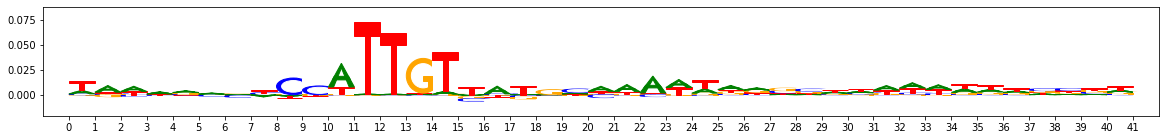

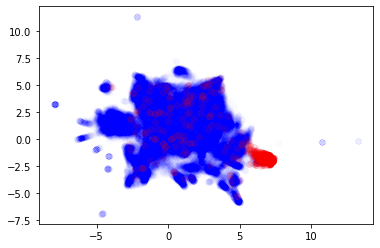

1 numseqlets 838


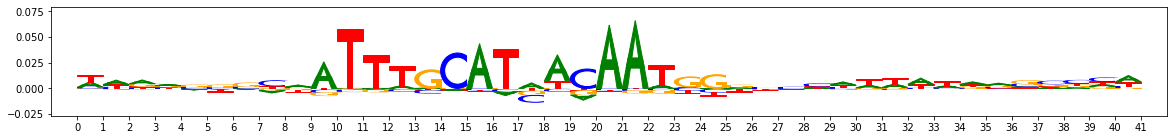

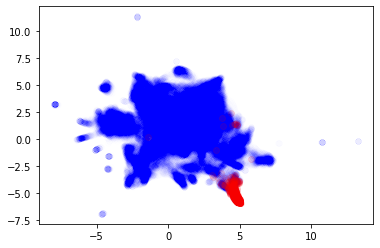

2 numseqlets 400


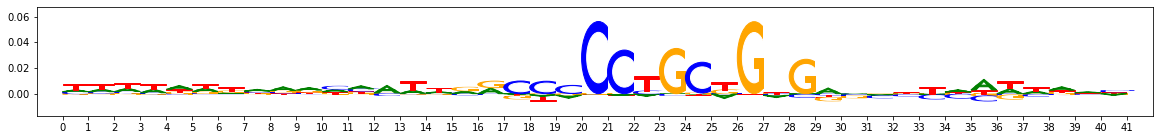

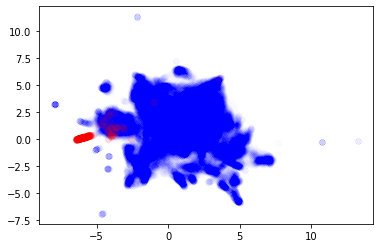

3 numseqlets 349


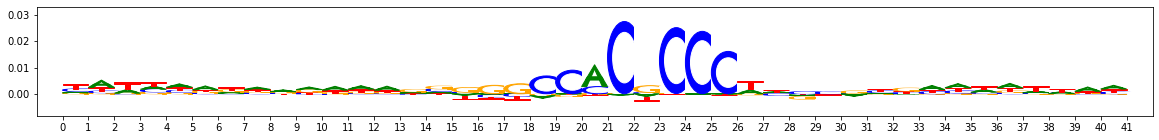

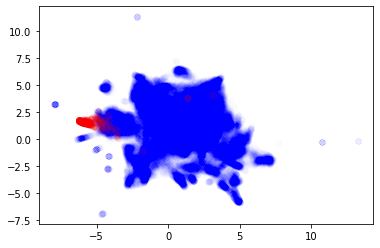

4 numseqlets 334


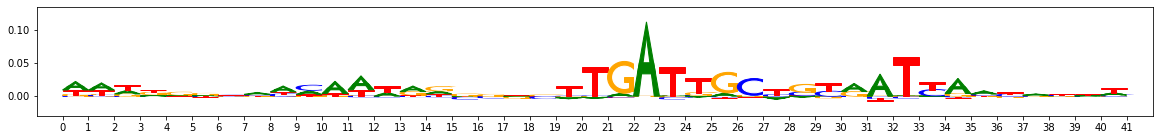

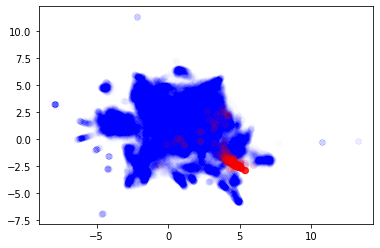

5 numseqlets 330


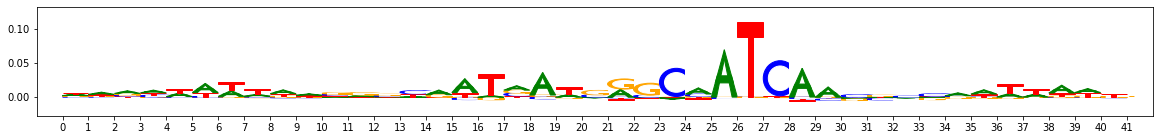

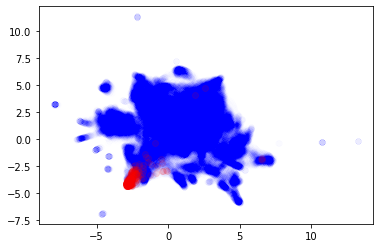

6 numseqlets 272


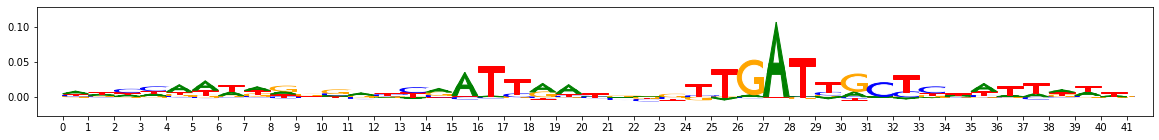

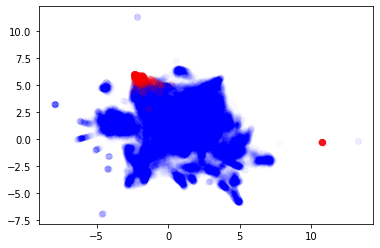

7 numseqlets 248


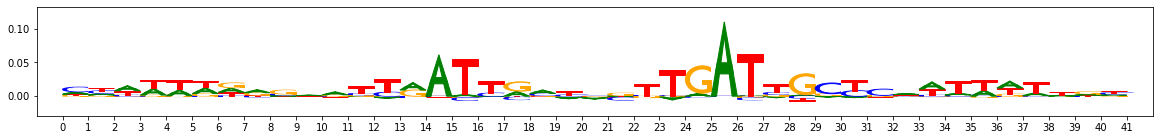

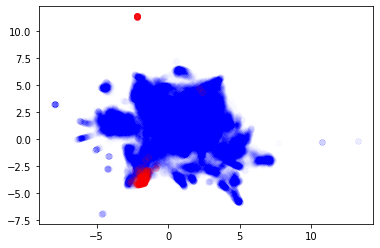

8 numseqlets 174


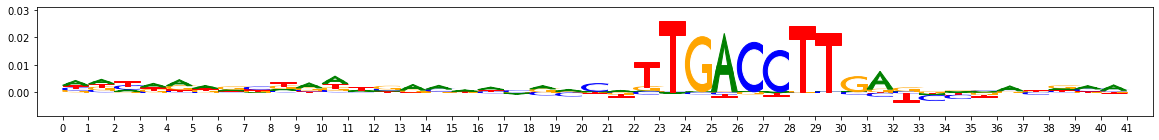

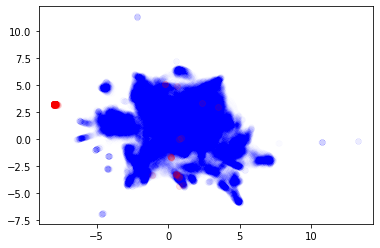

9 numseqlets 170


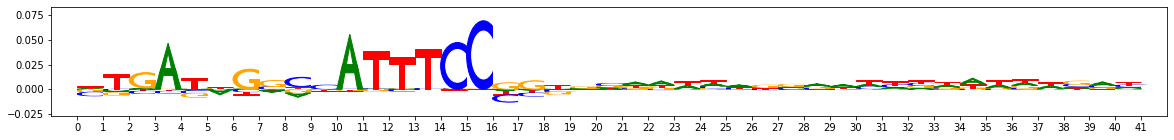

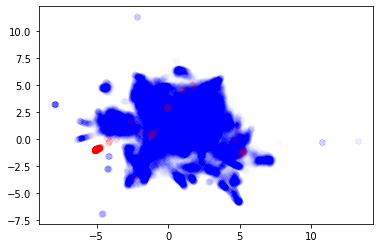

10 numseqlets 122


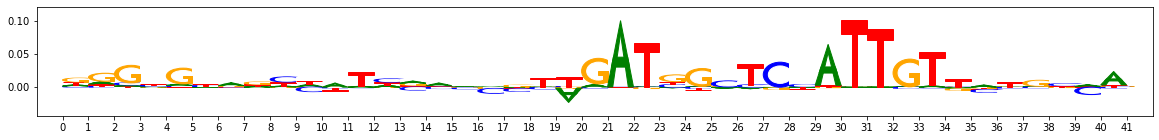

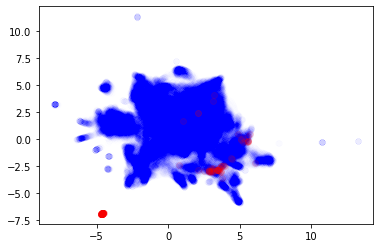

11 numseqlets 97


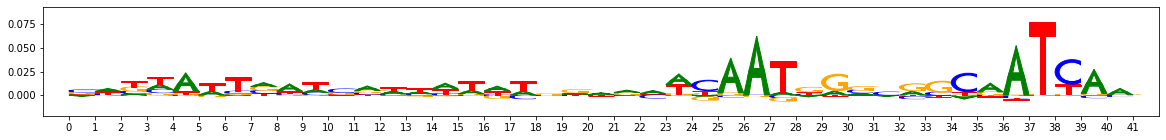

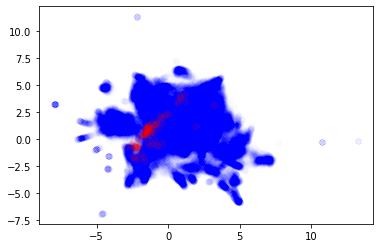

12 numseqlets 95


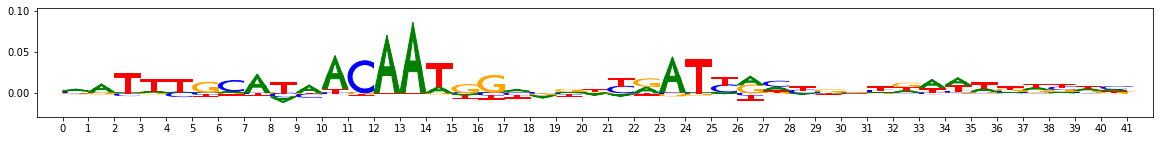

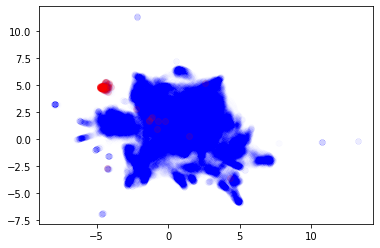

13 numseqlets 101


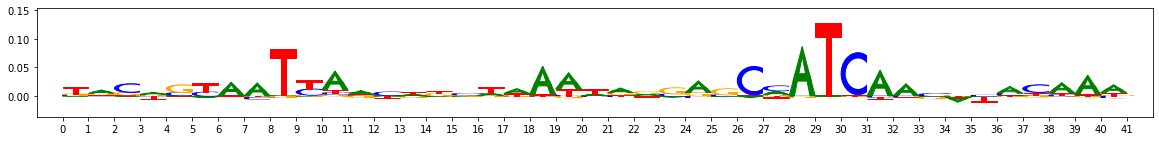

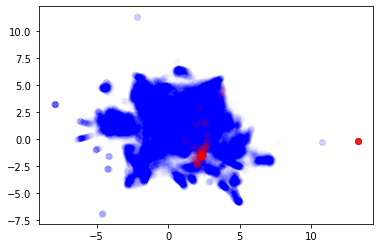

In [11]:
from matplotlib import pyplot as plt
from modisco.visualization import viz_sequence

def plot_embedding(embedding, **kwargs):
    plt.scatter(*zip(*embedding),**kwargs)

for pattern_idx in range(len(trimmed_patterns)):
    print(pattern_idx, "numseqlets", len(trimmed_patterns[pattern_idx].seqlets))
    viz_sequence.plot_weights(trimmed_patterns[pattern_idx]["Nanog_profile_wn_contrib_scores"].fwd)
    plot_embedding(embedding, alpha=0.003, color="blue")
    plot_embedding(embedding[labels[:,pattern_idx]==1], color="red", alpha=0.1)
    plt.show()

Pattern number 0
Num seqlets: 876


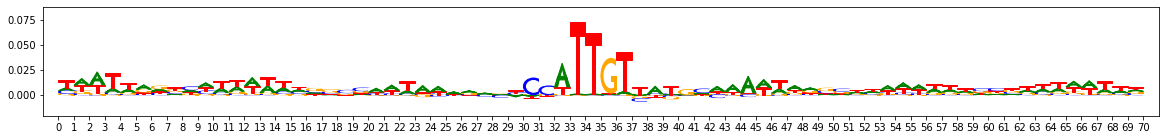

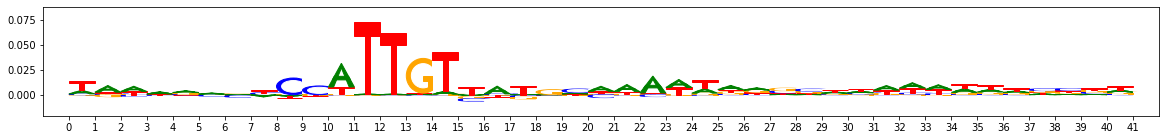

Exemplars


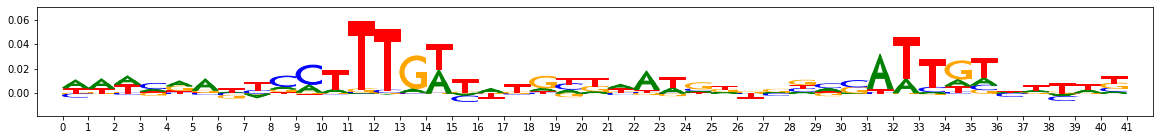

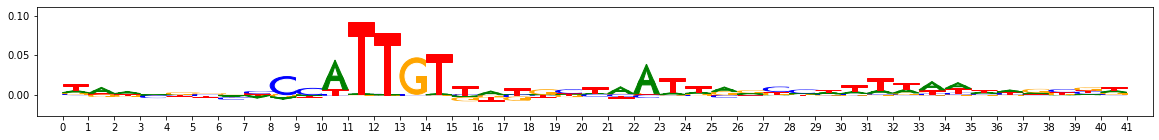

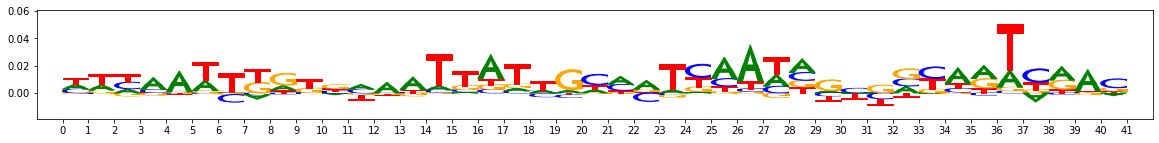

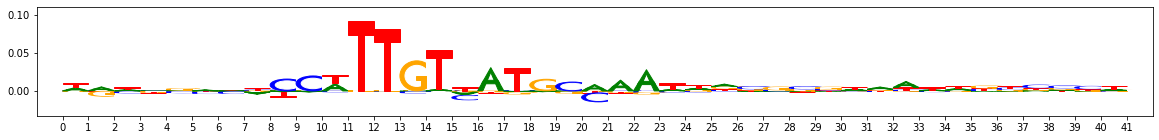

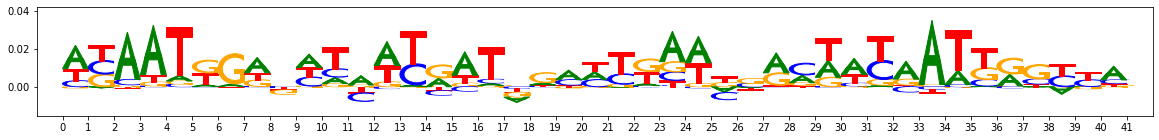

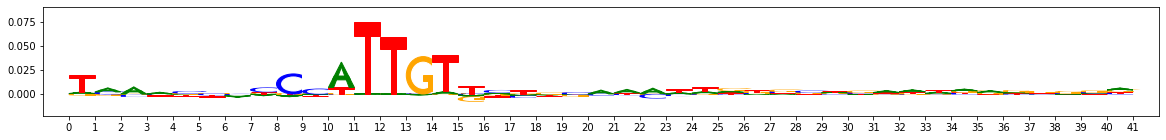

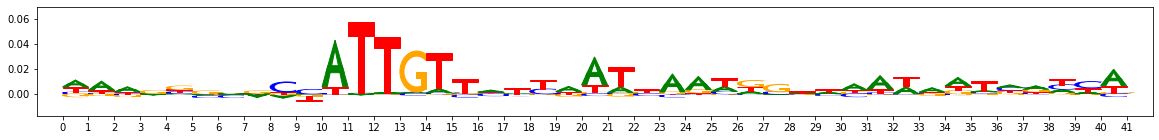

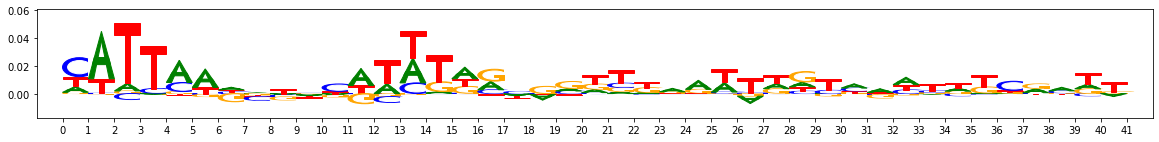

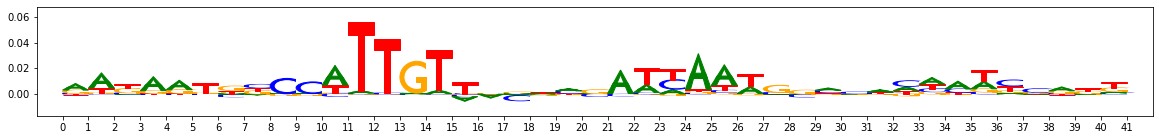

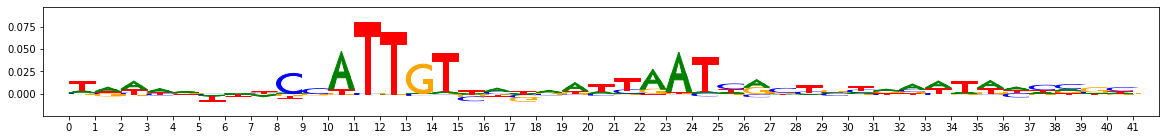

Pattern number 1
Num seqlets: 838


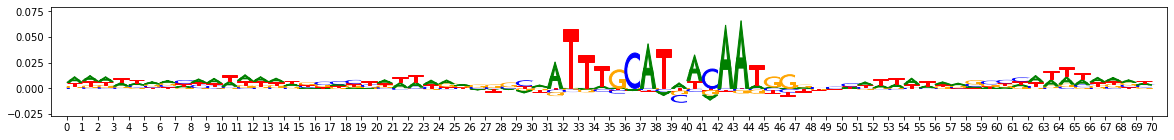

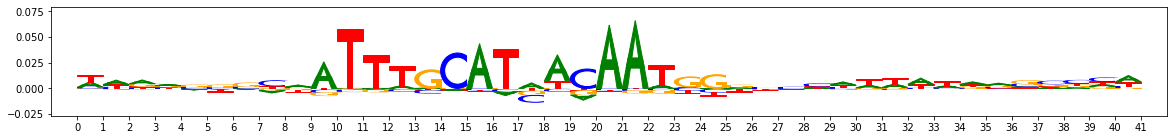

Exemplars


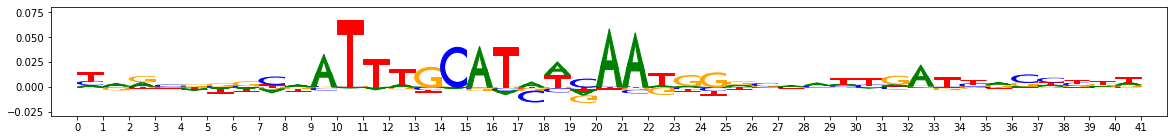

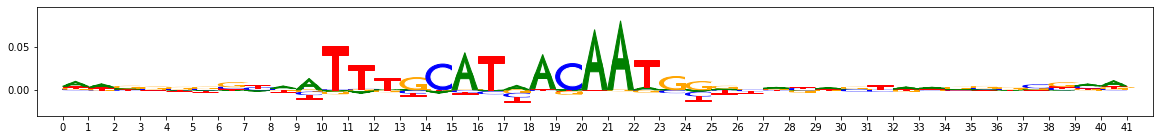

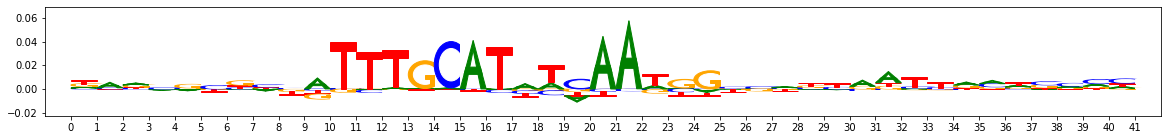

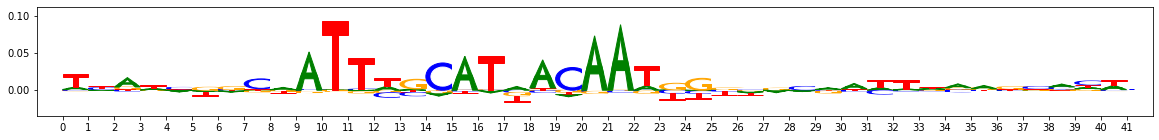

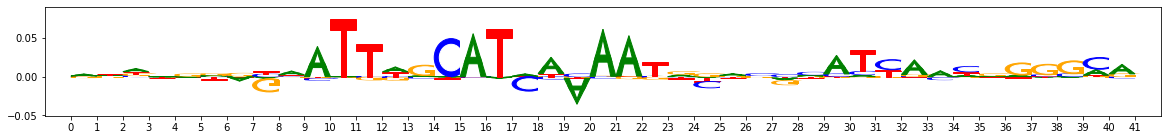

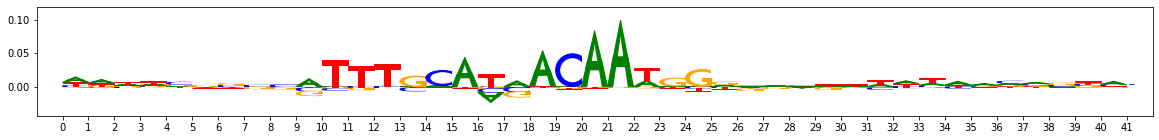

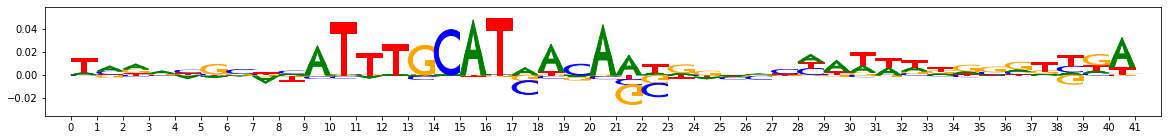

KeyboardInterrupt: 

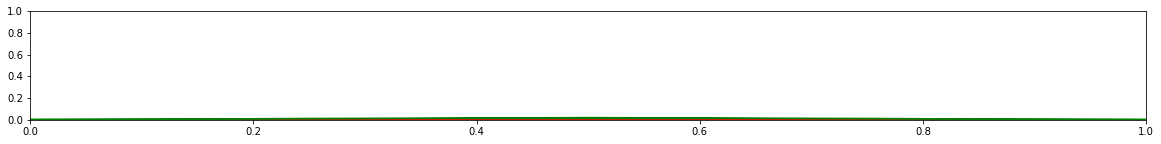

In [72]:
import modisco
from modisco.visualization import viz_sequence


for idx,(orig_pattern,pattern,exemplarmotifs) in enumerate(zip(patterns, trimmed_patterns, exemplarmotifs_foreach_pattern)):
    print("Pattern number",idx)
    print("Num seqlets:",len(pattern.seqlets))
    viz_sequence.plot_weights(orig_pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"].fwd)
    print("Exemplars")
    for exemplarmotif in exemplarmotifs:
        viz_sequence.plot_weights(exemplarmotif["Nanog_profile_wn_contrib_scores"].fwd)


[('metacluster_0', 'pattern_0'),
 ('metacluster_0', 'pattern_1'),
 ('metacluster_0', 'pattern_2'),
 ('metacluster_0', 'pattern_3'),
 ('metacluster_0', 'pattern_4'),
 ('metacluster_0', 'pattern_5'),
 ('metacluster_0', 'pattern_6'),
 ('metacluster_0', 'pattern_7'),
 ('metacluster_0', 'pattern_8'),
 ('metacluster_0', 'pattern_9'),
 ('metacluster_0', 'pattern_10'),
 ('metacluster_0', 'pattern_11'),
 ('metacluster_0', 'pattern_12'),
 ('metacluster_0', 'pattern_13')]